In [21]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#importing the models from scikitlearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


In [3]:
df =pd.read_csv("crime.csv")

In [4]:
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [5]:
df.tail()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
530647,Break and Enter Residential/Other,2017,3,3,9.0,16.0,31XX ADANAC ST,Hastings-Sunrise,497265.49,5458296.71,49.277420,-123.037595
530648,Mischief,2017,5,29,22.0,30.0,14XX E 7TH AVE,Grandview-Woodland,494533.97,5456824.97,49.264163,-123.075129
530649,Offence Against a Person,2017,4,13,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.00,0.00,0.000000,0.000000
530650,Theft from Vehicle,2017,6,5,17.0,0.0,8XX HAMILTON ST,Central Business District,491487.85,5458385.78,49.278168,-123.117031
530651,Vehicle Collision or Pedestrian Struck (with I...,2017,6,6,17.0,38.0,13XX BLOCK PARK DR,Marpole,490204.00,5451444.00,49.215706,-123.134512


In [6]:
df.shape

(530652, 12)

In [7]:
df.isnull().sum()

TYPE                 0
YEAR                 0
MONTH                0
DAY                  0
HOUR             54362
MINUTE           54362
HUNDRED_BLOCK       13
NEIGHBOURHOOD    56624
X                    0
Y                    0
Latitude             0
Longitude            0
dtype: int64

In [8]:
df.describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,X,Y,Latitude,Longitude
count,530652.000000,530652.000000,530652.000000,476290.000000,476290.000000,530652.000000,5.306520e+05,530652.000000,530652.000000
mean,2009.197956,6.450597,15.408590,13.711254,16.940039,441802.149909,4.897663e+06,44.216029,-110.495297
std,4.386272,3.399212,8.750642,6.767744,18.418950,149281.547656,1.654633e+06,14.938004,37.329862
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-124.549757
25%,2005.000000,4.000000,8.000000,9.000000,0.000000,489944.452500,5.453651e+06,49.235573,-123.127194
50%,2009.000000,6.000000,15.000000,15.000000,10.000000,491499.240000,5.456840e+06,49.264251,-123.107128
75%,2013.000000,9.000000,23.000000,19.000000,30.000000,493547.210000,5.458638e+06,49.280441,-123.065932
max,2017.000000,12.000000,31.000000,23.000000,59.000000,511303.000000,5.512579e+06,49.755314,0.000000


In [9]:
df.dtypes

TYPE              object
YEAR               int64
MONTH              int64
DAY                int64
HOUR             float64
MINUTE           float64
HUNDRED_BLOCK     object
NEIGHBOURHOOD     object
X                float64
Y                float64
Latitude         float64
Longitude        float64
dtype: object

In [10]:
df_drop = ['Latitude', 'Longitude','MINUTE', 'X', 'Y']



In [11]:
df.columns

Index(['TYPE', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'HUNDRED_BLOCK',
       'NEIGHBOURHOOD', 'X', 'Y', 'Latitude', 'Longitude'],
      dtype='object')

In [12]:
df = df.drop(columns=df_drop)

In [13]:
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD
0,Other Theft,2003,5,12,16.0,9XX TERMINAL AVE,Strathcona
1,Other Theft,2003,5,7,15.0,9XX TERMINAL AVE,Strathcona
2,Other Theft,2003,4,23,16.0,9XX TERMINAL AVE,Strathcona
3,Other Theft,2003,4,20,11.0,9XX TERMINAL AVE,Strathcona
4,Other Theft,2003,4,12,17.0,9XX TERMINAL AVE,Strathcona


In [14]:
df.isnull().sum()

TYPE                 0
YEAR                 0
MONTH                0
DAY                  0
HOUR             54362
HUNDRED_BLOCK       13
NEIGHBOURHOOD    56624
dtype: int64

In [15]:
df = df.dropna() #remove all missing values from dataset
df.tail()


,TYPE,YEAR,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD
530646,Mischief,2017,1,18,14.0,14XX E HASTINGS ST,Grandview-Woodland
530647,Break and Enter Residential/Other,2017,3,3,9.0,31XX ADANAC ST,Hastings-Sunrise
530648,Mischief,2017,5,29,22.0,14XX E 7TH AVE,Grandview-Woodland
530650,Theft from Vehicle,2017,6,5,17.0,8XX HAMILTON ST,Central Business District
530651,Vehicle Collision or Pedestrian Struck (with I...,2017,6,6,17.0,13XX BLOCK PARK DR,Marpole


In [16]:
df.isnull().sum() #check if there are still issing values in dataset that we need to clean

TYPE             0
YEAR             0
MONTH            0
DAY              0
HOUR             0
HUNDRED_BLOCK    0
NEIGHBOURHOOD    0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474015 entries, 0 to 530651
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           474015 non-null  object 
 1   YEAR           474015 non-null  int64  
 2   MONTH          474015 non-null  int64  
 3   DAY            474015 non-null  int64  
 4   HOUR           474015 non-null  float64
 5   HUNDRED_BLOCK  474015 non-null  object 
 6   NEIGHBOURHOOD  474015 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 28.9+ MB


VISUALIZATIONS

In [18]:
df.corr()

,YEAR,MONTH,DAY,HOUR
YEAR,1.000000,-0.035785,-0.006853,-0.011145
MONTH,-0.035785,1.000000,0.006609,0.000012
DAY,-0.006853,0.006609,1.000000,0.004445
HOUR,-0.011145,0.000012,0.004445,1.000000


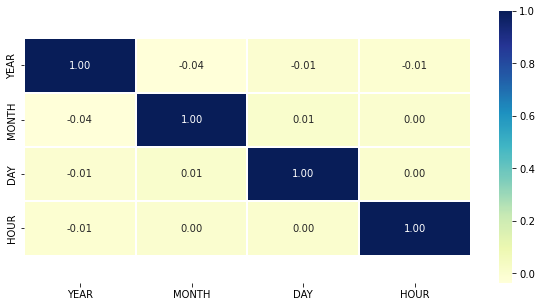

In [28]:
corr_martix =  df.corr()
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(corr_martix, annot=True, linewidths=0.4, fmt=".2f", cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5);